# Credit Card Default Risk

# Problem Overview
ABC Company has data regarding their existing credit card customers to analyse credit card default.

# Task
To predict credit card defaults by building a machine learning model

Importing Required Libraries

In [228]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

Loading dataset

In [229]:
train_data = pd.read_csv(r'C:\Users\user\Downloads\dataset\train.csv', index_col='customer_id')
test_data = pd.read_csv(r'C:\Users\user\Downloads\dataset\test.csv', index_col='customer_id')
samp_data = pd.read_csv(r'C:\Users\user\Downloads\dataset\sample_submission.csv')

In [230]:
train_data.shape

(45528, 18)

In [231]:
test_data.shape

(11383, 17)

In [232]:
train_data.head()

,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
customer_id,,,,,,,,,,,,,,,,,,
CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [233]:
test_data.head()

,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
customer_id,,,,,,,,,,,,,,,,,
CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [234]:
samp_data

,customer_id,credit_card_default
0,CST_115179,1
1,CST_121920,0
2,CST_109330,0
3,CST_128288,0
4,CST_151355,0


# Data Pre Processing

In [235]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45528 entries, CST_115179 to CST_160078
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     45528 non-null  object 
 1   age                      45528 non-null  int64  
 2   gender                   45528 non-null  object 
 3   owns_car                 44981 non-null  object 
 4   owns_house               45528 non-null  object 
 5   no_of_children           44754 non-null  float64
 6   net_yearly_income        45528 non-null  float64
 7   no_of_days_employed      45065 non-null  float64
 8   occupation_type          45528 non-null  object 
 9   total_family_members     45445 non-null  float64
 10  migrant_worker           45441 non-null  float64
 11  yearly_debt_payments     45433 non-null  float64
 12  credit_limit             45528 non-null  float64
 13  credit_limit_used(%)     45528 non-null  int64  
 14  credit_score 

In [236]:
# Checking for unique values / invalid entries

In [237]:
train_data.gender.unique()

array(['F', 'M', 'XNA'], dtype=object)

In [238]:
train_data.owns_car.unique()

array(['N', 'Y', nan], dtype=object)

In [239]:
train_data.owns_house.unique()

array(['Y', 'N'], dtype=object)

In [240]:
train_data.occupation_type.unique()

array(['Unknown', 'Laborers', 'Core staff', 'Accountants',
       'High skill tech staff', 'Sales staff', 'Managers', 'Drivers',
       'Medicine staff', 'Cleaning staff', 'HR staff', 'Security staff',
       'Cooking staff', 'Waiters/barmen staff', 'Low-skill Laborers',
       'Private service staff', 'Secretaries', 'Realty agents',
       'IT staff'], dtype=object)

All object values were found to be unique in this dataset

In [241]:
# Checking for null values

In [242]:
train_data.isna().sum()

name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

It is evident from the above information that there are missing values in 'owns_car', 'no_of_children', 'no_of_days_employed', 'total_family_members', 'migrant_worker', 'yearly_debt_payments' and 'credit_score'

In [243]:
series = train_data.isna().sum()
missing_total = series[series.values>0]

series1 = round(train_data.isna().mean()*100, 4)
missing_percentage = series1[series1.values>0]

df = pd.concat([missing_total, missing_percentage], axis=1, keys=['Missing_total', 'Missing_percentage'])
df

,Missing_total,Missing_percentage
owns_car,547,1.2015
no_of_children,774,1.7001
no_of_days_employed,463,1.0170
total_family_members,83,0.1823
migrant_worker,87,0.1911
yearly_debt_payments,95,0.2087
credit_score,8,0.0176


Since the missing percentage is low, dropping all the missing values in the data.

In [244]:
train_data = train_data.dropna(how ='any')
train_data.isna().sum().sum()

0

In [245]:
train_data.shape

(43509, 18)

In [246]:
# Checking for duplicate rows

In [247]:
train_data.duplicated().sum()

0

There are no duplicate rows in this dataset

# Statistical description of the numerical data.

In [248]:
train_data.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,43509.000000,43509.000000,4.350900e+04,43509.000000,43509.000000,43509.000000,43509.000000,4.350900e+04,43509.000000,43509.000000,43509.000000,43509.000000,43509.000000
mean,38.997885,0.420947,2.008968e+05,67631.328438,2.159002,0.179641,31812.731181,4.360426e+04,52.235721,782.785332,0.060769,0.050748,0.081156
std,9.543480,0.724627,6.840522e+05,139341.558948,0.912460,0.383893,17274.938283,1.520773e+05,29.380952,100.585008,0.264391,0.219485,0.273077
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.000000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.262890e+05,937.000000,2.000000,0.000000,19238.220000,2.397718e+04,27.000000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.716450e+05,2224.000000,2.000000,0.000000,29105.130000,3.569072e+04,54.000000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.407659e+05,5812.000000,3.000000,0.000000,40577.850000,5.348147e+04,79.000000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.000000,949.000000,2.000000,1.000000,1.000000


# Correlation matrix and pairplot.

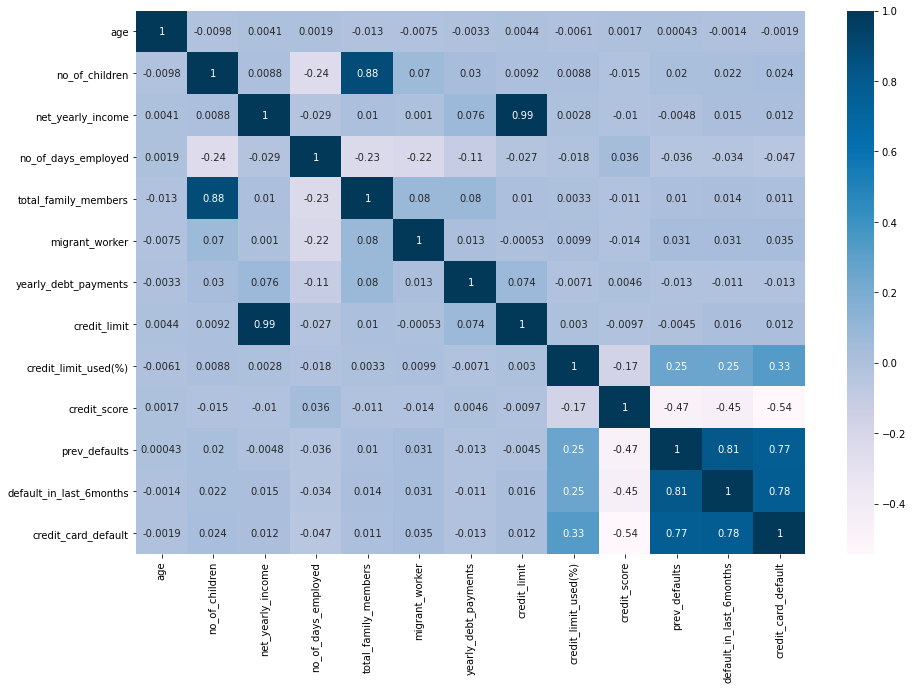

In [249]:
#train_data
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True, cmap = 'PuBu')
plt.show()

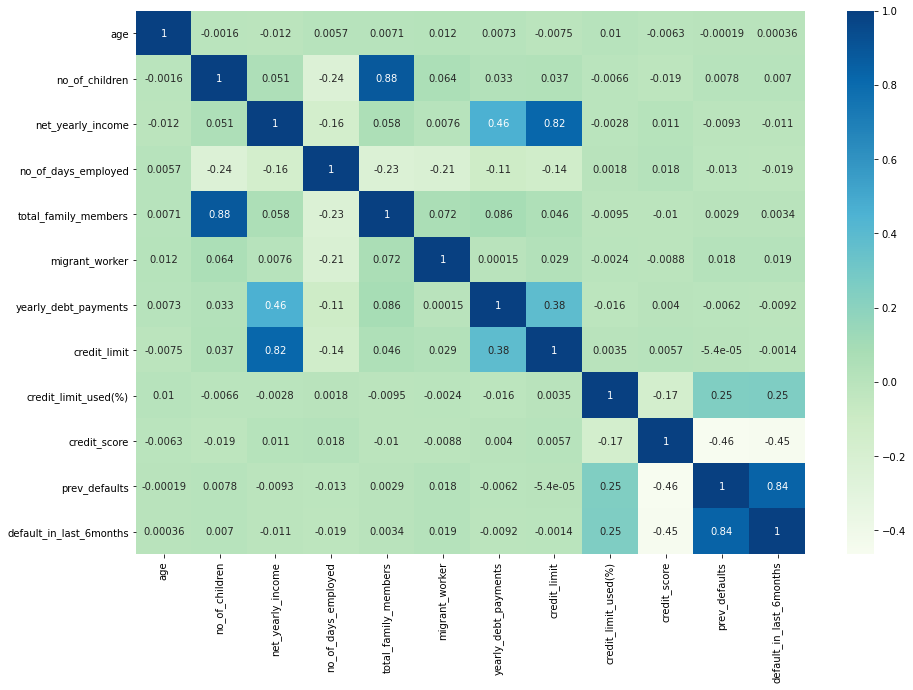

In [250]:
#test_data
plt.figure(figsize=(15,10))
sns.heatmap(test_data.corr(),annot=True,cmap = 'GnBu')
plt.show()

Net yearly income and Credit limit are highly correlated. Previous defaults and default in last 6 months are highly correlated.
Net yearly income and yearly debt payments are slightly correlated

# Histogram of Numerical Variables

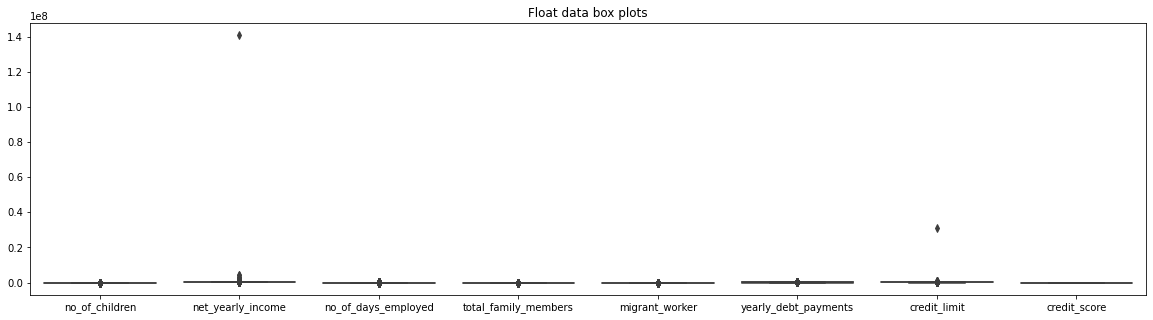

In [251]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train_data.select_dtypes(include = ['float64']))
plt.title('Float data box plots')
plt.show()

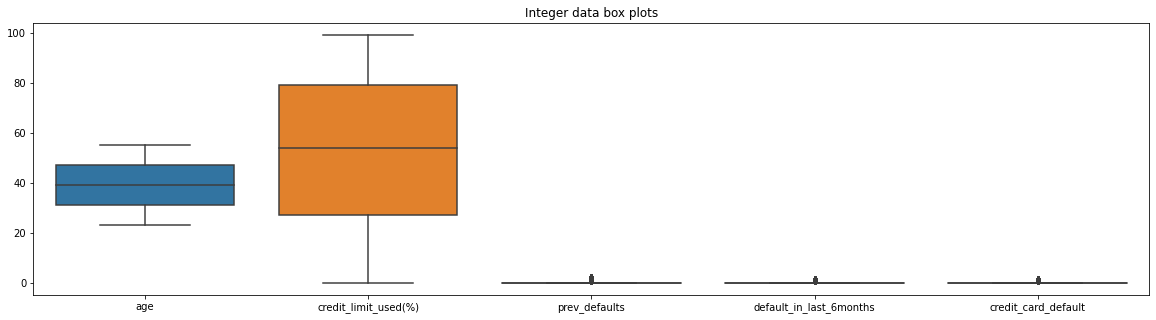

In [252]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train_data.select_dtypes(include = ['int64']))
plt.title('Integer data box plots')
plt.show()

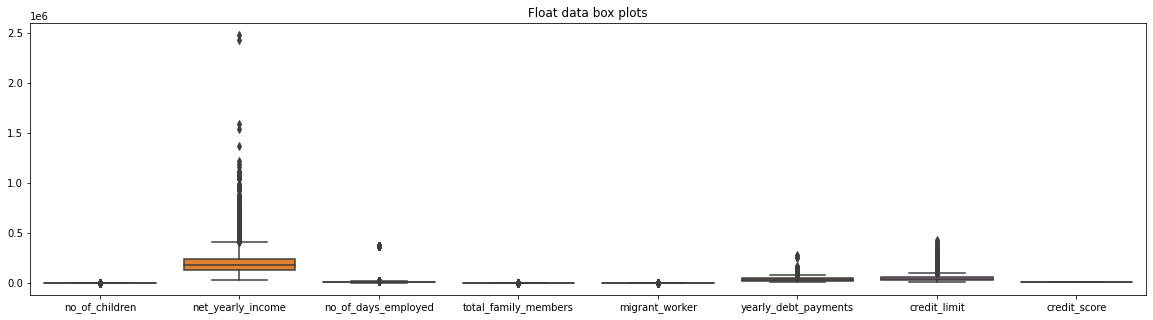

In [253]:
plt.figure(figsize=(20,5))
sns.boxplot(data=test_data.select_dtypes(include = ['float64']))
plt.title('Float data box plots')
plt.show()

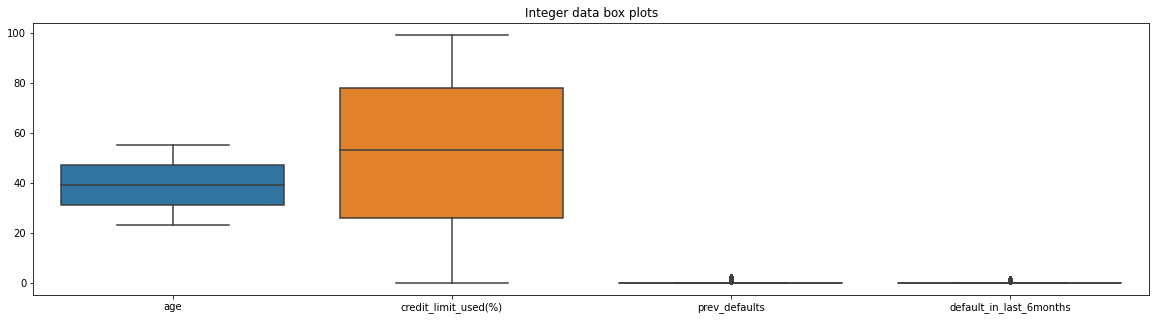

In [254]:
plt.figure(figsize=(20,5))
sns.boxplot(data=test_data.select_dtypes(include = ['int64']))
plt.title('Integer data box plots')
plt.show()

In [255]:
nums = train_data.select_dtypes(include=['float64'])
print(nums.shape)
print(nums.columns)

(43509, 8)
Index(['no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_score'],
      dtype='object')


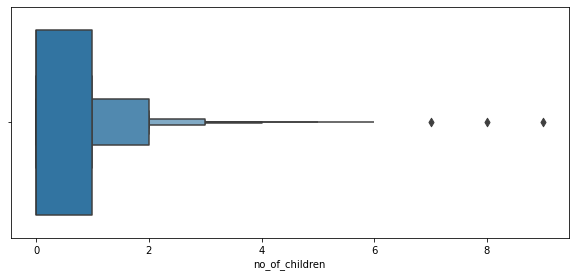

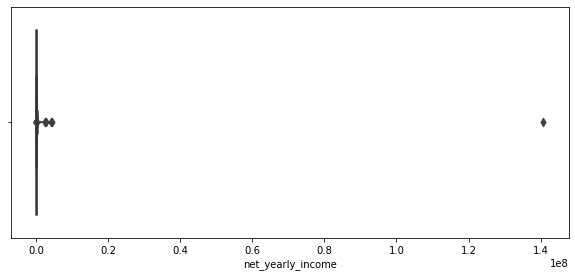

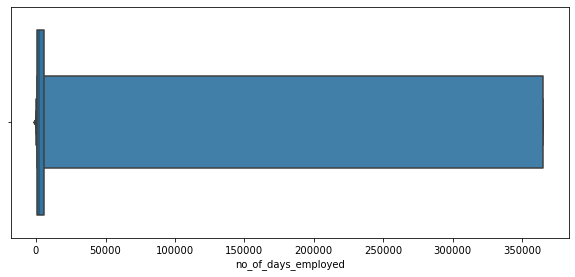

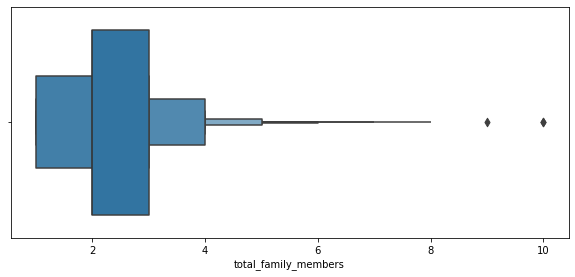

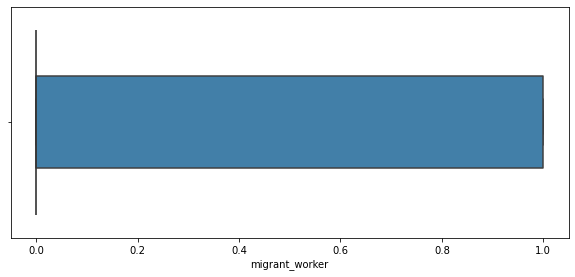

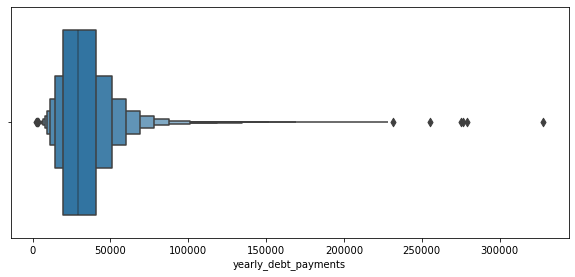

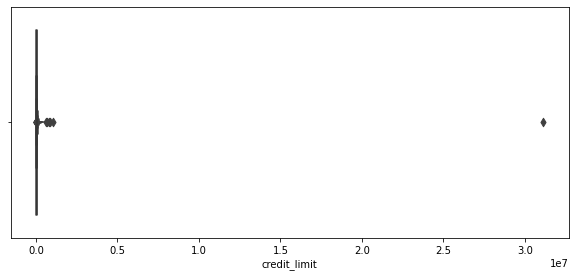

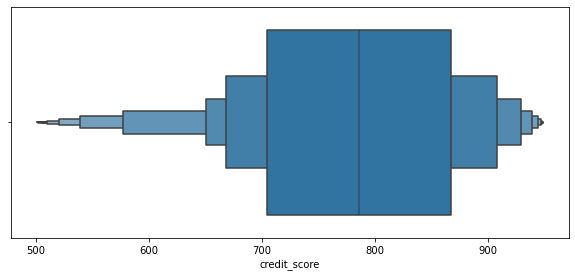

In [256]:
for index,column in enumerate(nums):
    fig=plt.figure(figsize=(10,40))
    plt.subplot(8,1,index+1)
    sns.boxenplot(nums[column])
    plt.xlabel(column)

In [257]:
# test_data
def create_boxkde(column):
    fig , (a1, a2) = plt.subplots(ncols = 2, figsize = (20,5))
    sns.boxplot(x = column, data = test_data, ax=a1, color = 'r')
    a1.set_title('Box plot for ' + column)
    sns.distplot(test_data[column], ax=a2)
    a2.set_title('Distribution of ' + column)
    plt.show()

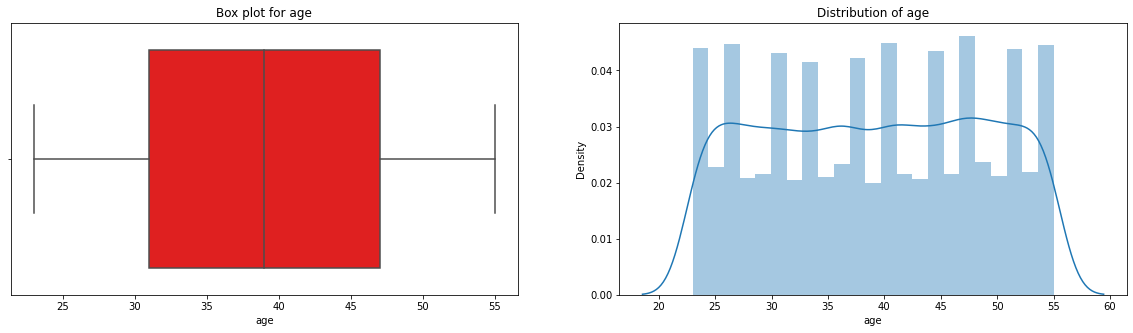

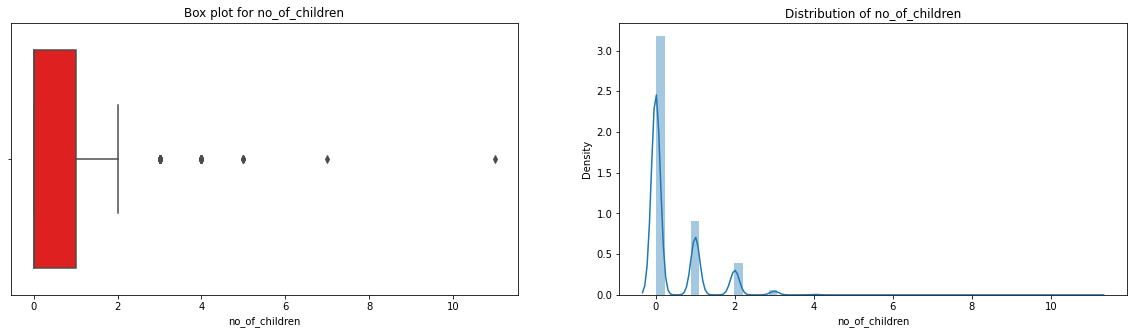

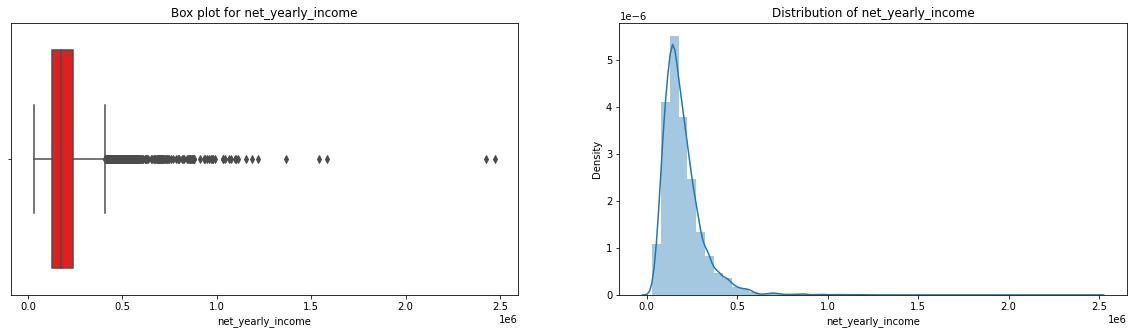

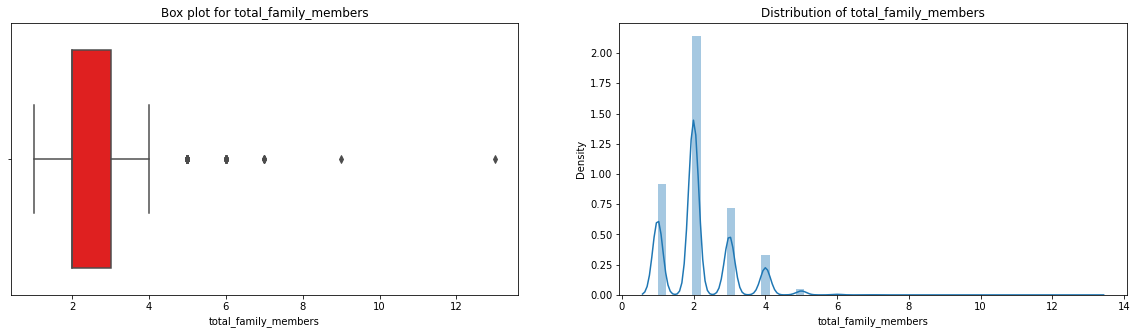

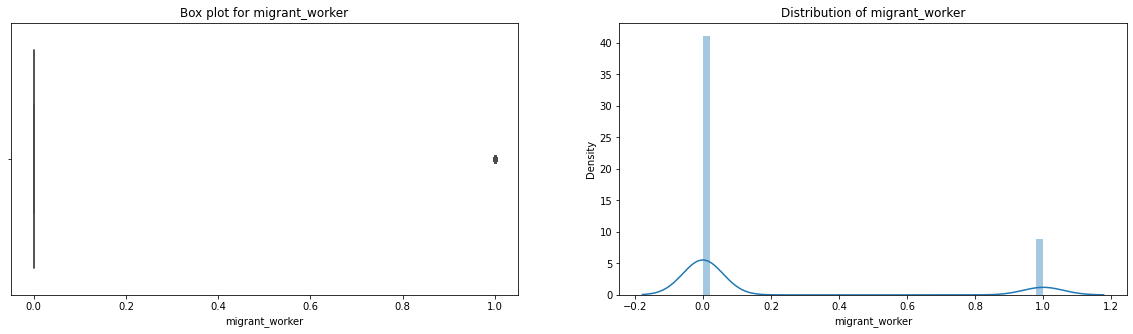

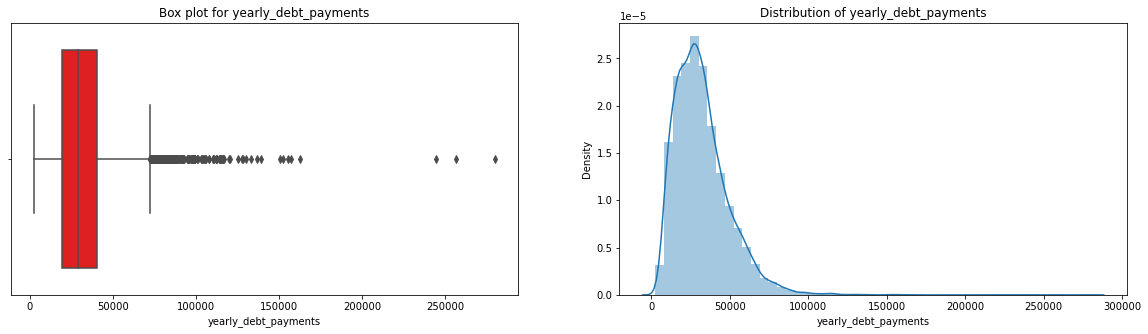

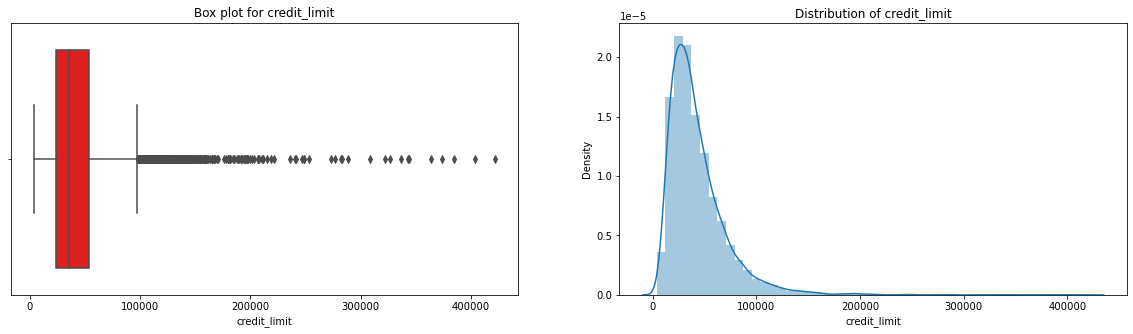

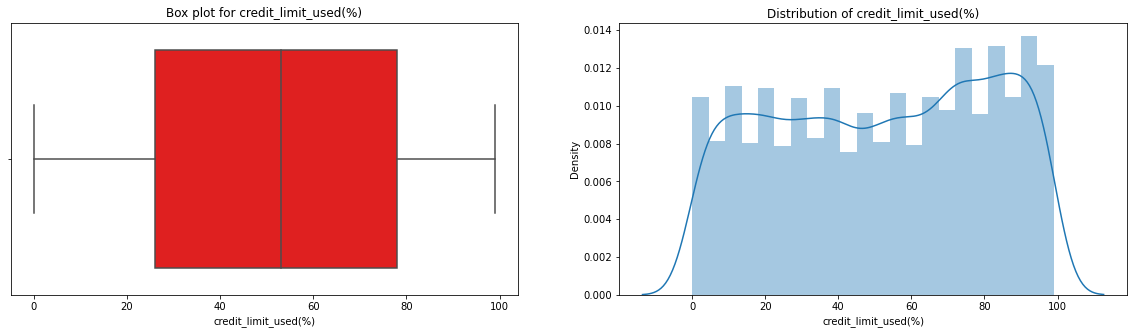

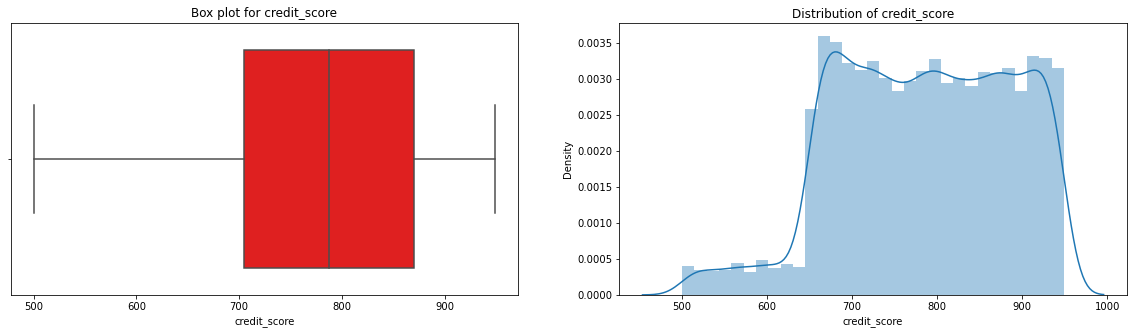

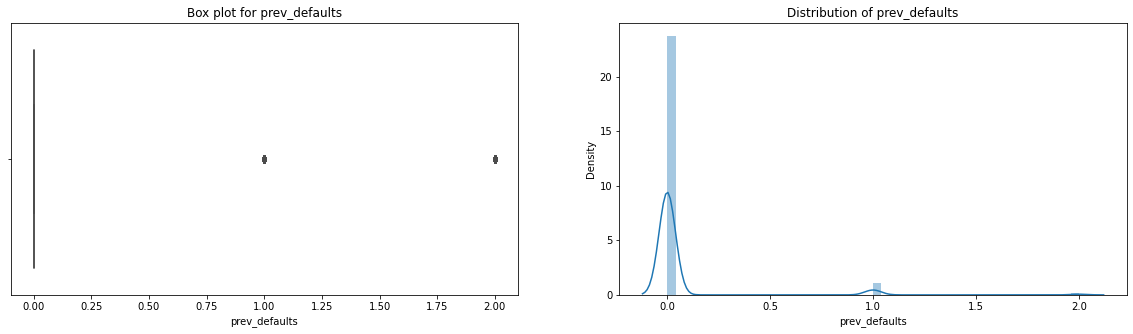

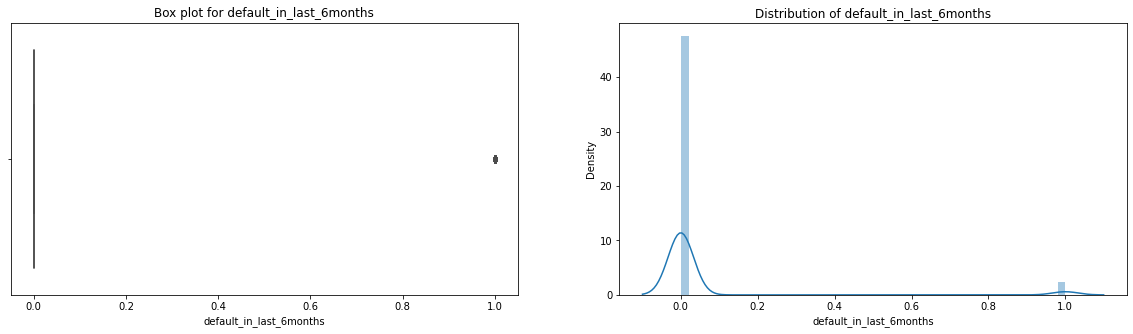

In [258]:
create_boxkde('age')
create_boxkde('no_of_children')
create_boxkde('net_yearly_income')
create_boxkde('total_family_members')
create_boxkde('migrant_worker')
create_boxkde('yearly_debt_payments')
create_boxkde('credit_limit')
create_boxkde('credit_limit_used(%)')
create_boxkde('credit_score')
create_boxkde('prev_defaults')
create_boxkde('default_in_last_6months')

In [259]:
# train_data
def create_boxkde(column):
    fig , (a1, a2) = plt.subplots(ncols = 2, figsize = (20,5))
    sns.boxplot(x = column, data = train_data, ax=a1, color = 'r')
    a1.set_title('Box plot for ' + column)
    sns.distplot(train_data[column], ax=a2)
    a2.set_title('Distribution of ' + column)
    plt.show()

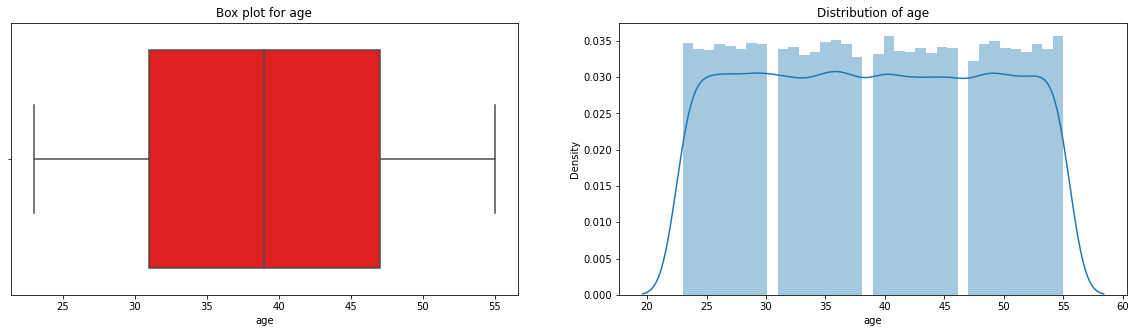

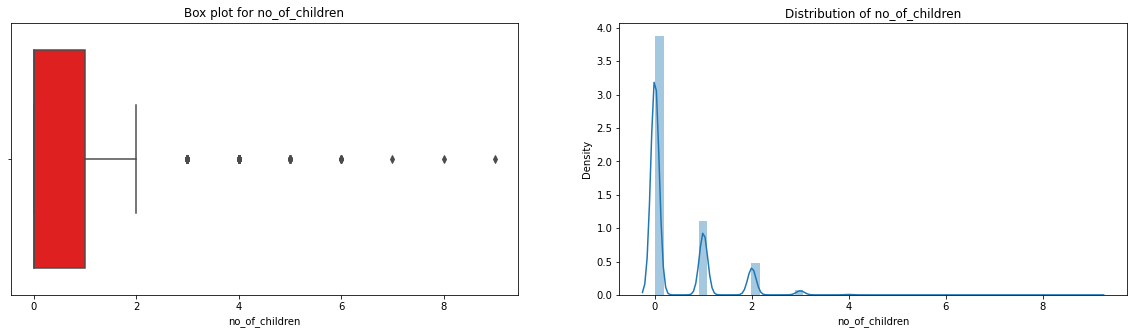

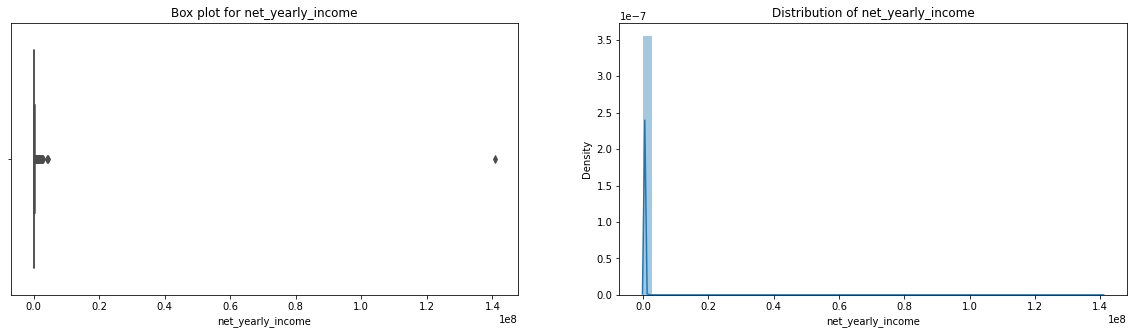

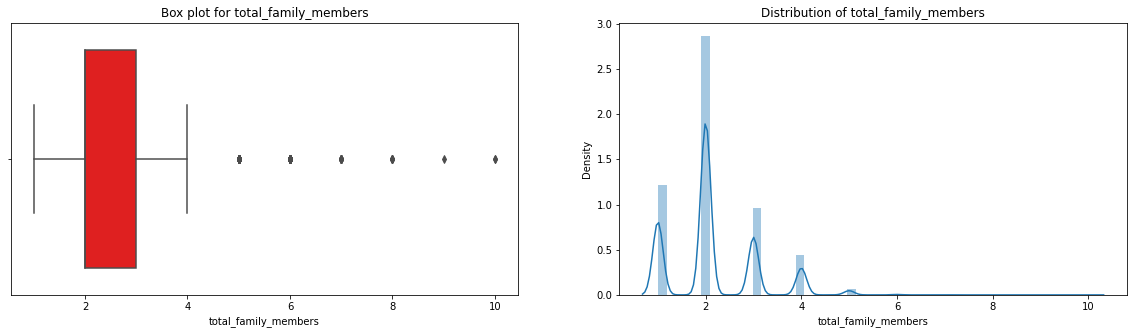

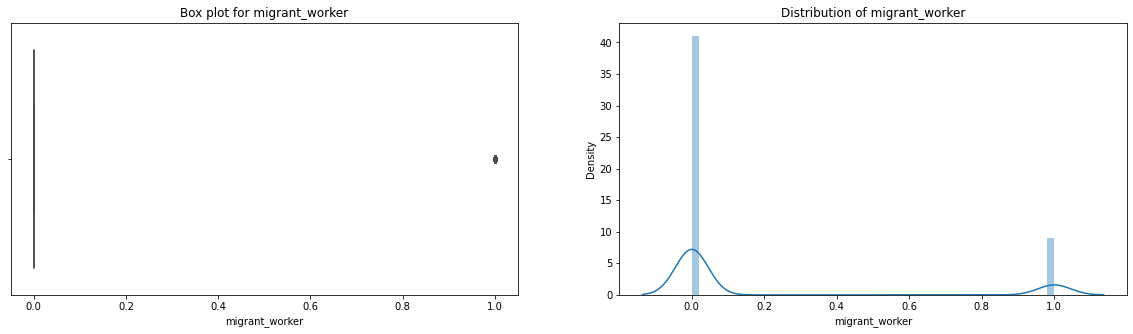

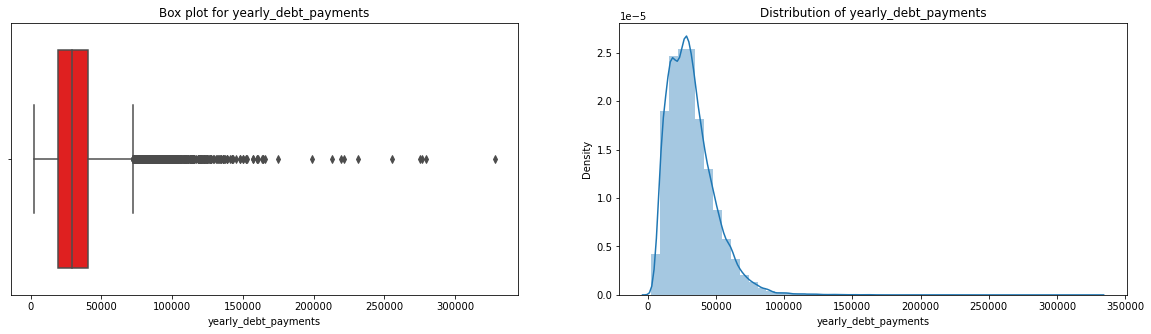

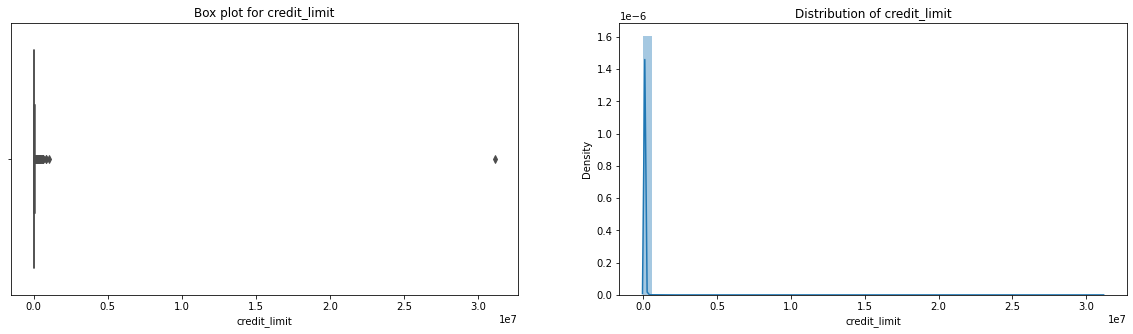

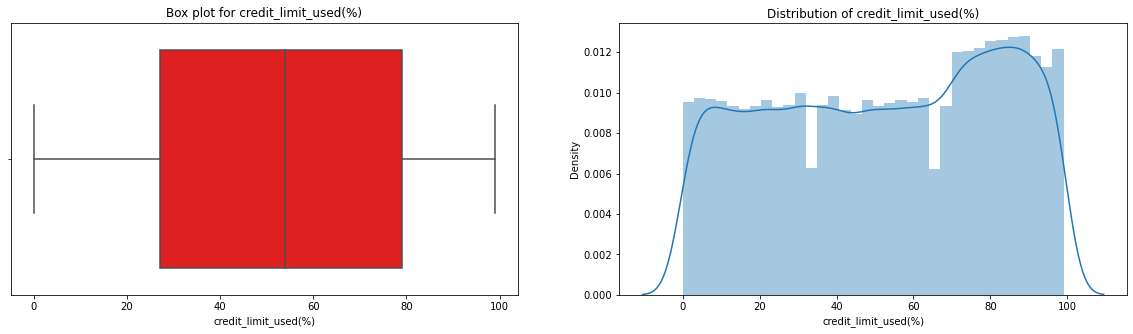

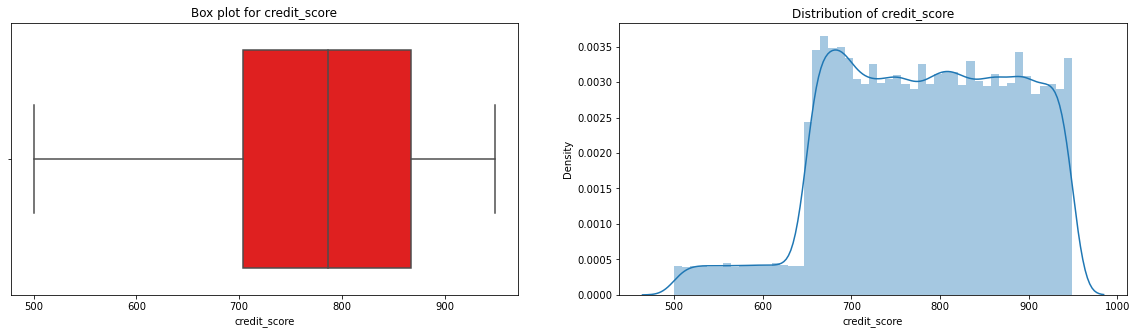

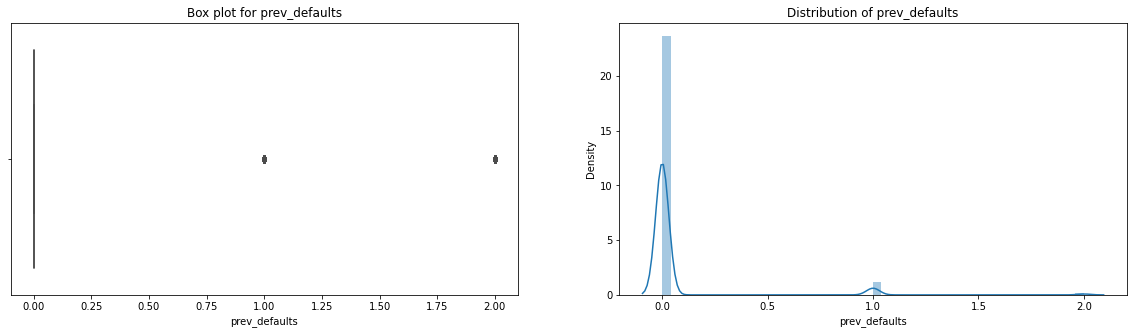

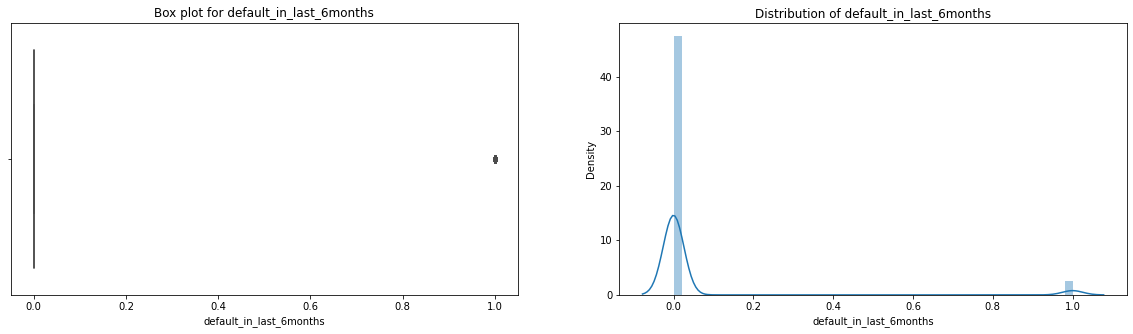

In [260]:
create_boxkde('age')
create_boxkde('no_of_children')
create_boxkde('net_yearly_income')
create_boxkde('total_family_members')
create_boxkde('migrant_worker')
create_boxkde('yearly_debt_payments')
create_boxkde('credit_limit')
create_boxkde('credit_limit_used(%)')
create_boxkde('credit_score')
create_boxkde('prev_defaults')
create_boxkde('default_in_last_6months')

In [261]:
# Normalising the numerical variables.

In [262]:
nums_arr = normalize(nums)
nums = pd.DataFrame(nums_arr, columns=nums.columns)
nums.head()

,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_score
0,0.0,0.943261,0.005348,0.000009,0.000009,0.289009,0.163344,0.004754
1,0.0,0.937324,0.023642,0.000017,0.000000,0.130788,0.322034,0.007312
2,0.0,0.963621,0.000854,0.000008,0.000000,0.202714,0.174167,0.002721
3,0.0,0.947126,0.092455,0.000015,0.000000,0.174785,0.252625,0.005838
4,0.0,0.986055,0.003715,0.000003,0.000000,0.097471,0.134816,0.002360
